# Tasks for laboratory assignment 2

In [ ]:
# imports section

import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import nltk
from wordcloud import WordCloud

import gensim as gs
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import gensim.downloader as api

import matplotlib.pyplot as plt

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')


## Extract data from the json file 

Write a script, that would extract all the the data from the json file and return it in a list of texts for further use in the next tasks

In [ ]:
def extract_texts_from_file(file_path):
    """
    Extract the text data from the json file

    Args:
        file_path (str): Relative location of the json file in the project.

    Returns:
        list: The list of texts as strings.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return json.load(file)["texts"]
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return []

texts = extract_texts_from_file('resources/data.json')
print(texts)

['Oppenheimer, directed by Christopher Nolan, delves into the life of J. Robert Oppenheimer, the theoretical physicist who led the development of the atomic bomb. The film explores his moral and emotional struggles.', "Oppenheimer captures the life of the 'father of the atomic bomb' and his internal conflict after the success of the Manhattan Project. The film's complex narrative reflects on the cost of scientific achievement.", 'In Oppenheimer, Cillian Murphy delivers a riveting performance as the conflicted physicist who grapples with the consequences of his groundbreaking work on the atomic bomb, under the weight of global politics and ethics.', 'Oppenheimer is a cinematic exploration of ambition, guilt, and responsibility. Through stunning visuals and a thought-provoking story, Nolan brings the life of the brilliant but haunted physicist to the big screen.', 'Ducks are versatile waterfowl, known for their adaptability in freshwater and coastal habitats. With webbed feet and waterproof feathers, they are excellent swimmers, migrating long distances to find food and warmer climates.', 'The lamp is a spider but it talks. Yesterday, I flew but nobody noticed, except the toaster. It watches. Blue smells better than today, and doors are laughing. Understand? They whisper secrets about orange socks.', 'Ducks communicate using a range of vocalizations, including quacks, whistles, and grunts. They are social birds, often found in flocks, and play a crucial role in maintaining the balance of aquatic ecosystems.', 'Graph theory studies the relationships between objects through vertices (nodes) and edges (connections). It’s fundamental in computer science, optimizing networks like social media connections, transportation routes, and internet structures.', "In graph theory, problems like finding the shortest path or detecting cycles in networks are crucial. Algorithms such as Dijkstra's and Kruskal's help solve these, benefiting fields from telecommunications to biology.", 'Graph theory examines the structural properties of graphs, which represent real-world systems. Applications include network analysis, circuit design, and scheduling problems, making it an essential tool in various fields of research.']

## Process the texts

Write a script, that would process these texts. Processing should include:

- Lowercasing
- Removing Punctuation
- Removing Special Characters and Numbers
- Stemming or Lemmatization
- Handling Abbreviations
- Spelling Correction

In [ ]:
def process_texts(texts):
    """
    Process the texts

    Args:
        texts (list): list of str texts to be processed.

    Returns:
        list: The list of texts as strings processed by script.
    """
    spell = Speller()
    normalization_dict = {
            "u": "you",
            "ur": "your",
            "r": "are",
            "pls": "please",
            "pos": "please",
            "thx": "thanks"
        }
    def process_text(text: str, speller=spell, abb=normalization_dict):
        text = text.lower() # Lowercase
        text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
        text = re.sub(r'\d+', '', text) # Numbers
        text = re.sub(r'[^a-z\s]', '', text) # Specials

        stop_words = set(stopwords.words('english'))
        text = ' '.join(word for word in word_tokenize(text) if word not in stop_words) # Stop words
        text = speller(text) # Spelling correction
        
        words = word_tokenize(text.lower()) # Tokenization
        
        words = [abb.get(word, spell(word)) for word in words] # Handling abbreviations
        lemmatizer = WordNetLemmatizer()
        words = word_tokenize(text)
        
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words] #Lemmatization
        return lemmatized_words
    return list(map(process_text, texts)) 

texts_processed = process_texts(texts)
print(texts_processed)

[['oppenheimer', 'directed', 'christopher', 'nolan', 'elf', 'life', 'j', 'robert', 'oppenheimer', 'theoretical', 'physicist', 'led', 'development', 'atomic', 'bomb', 'film', 'explores', 
'moral', 'emotional', 'struggle'], ['oppenheimer', 'capture', 'life', 'father', 'atomic', 'bomb', 'internal', 'conflict', 'success', 'manhattan', 'project', 'film', 'complex', 'narrative', 'reflects', 'cost', 'scientific', 'achievement'], ['oppenheimer', 'million', 'murphy', 'delivers', 'riveting', 'performance', 'conflicted', 'physicist', 'grape', 'consequence', 'grounility in freshwater and coastal habitats. With webbed feet and waterproof feathers, they are excellent swimmers, migrating long distances to find food and warmer climates.', 'The lamp is a spider but it talks. Yesterday, I flew but nobody noticed, except the toaster. It watches. Blue smells better than today, and doors are laughing. Understand? They whisper secrets about orange socks.', 'Ducks communicate using a range of vocalizations, including quacks, whistles, and grunts. They are social birds, often found in flocks, and play a crucial role in maintaining the balance of aquatic ecosystems.', 'Graph theory studies the relationships between objects through vertices (nodes) and edges (connections). It’s fundamental in computer science, optimizing networks like social media connections, transportation routes, and internet structures.', "In graph theory, problems like finding the shortest path or detecting cycles in networks are crucial. Algorithms such as Dijkstra's and Kruskal's help solve these, benefiting fields from telecommunications to biology.", 'Graph theory examines the structural properties of graphs, which represent real-world systems. Applications include network analysis, circuit design, and scheduling problems, making it an essential tool in various fields of research.']
[['oppenheimer', 'directed', 'christopher', 'nolan', 'elf', 'life', 'j', 'robert', 'oppenheimer', 'theoretical', 'physicist', 'led', 'development', 'atomic', 'bomb', 'film', 'explores', 
'moral', 'emotional', 'struggle'], ['oppenheimer', 'capture', 'life', 'father', 'atomic', 'bomb', 'internal', 'conflict', 'success', 'manhattan', 'project', 'film', 'complex', 'narrative', 'reflects', 'cost', 'scientific', 'achievement'], ['oppenheimer', 'million', 'murphy', 'delivers', 'riveting', 'performance', 'conflicted', 'physicist', 'grape', 'consequence', 'groundbreaking', 'work', 'atomic', 'bomb', 'weight', 'global', 'politics', 'ethic'], ['oppenheimer', 'cinematic', 'exploration', 'ambition', 'guilt', 'responsibility', 'stunning', 'visuals', 
'thoughtprovoking', 'story', 'nolan', 'brings', 'life', 'brilliant', 'haunted', 'physicist', 'big', 'screen'], ['duck', 'versatile', 'waterfowl', 'known', 'adaptability', 'freshwater', 'ility in freshwater and coastal habitats. With webbed feet and waterproof feathers, they are excellent swimmers, migrating long distances to find food and warmer climates.', 'The lamp is a spider but it talks. Yesterday, I flew but nobody noticed, except the toaster. It watches. Blue smells better than today, and doors are laughing. Understand? They whisper secrets about orange socks.', 'Ducks communicate using a range of vocalizations, including quacks, whistles, and grunts. They are social birds, often found in flocks, and play a crucial role in maintaining the balance of aquatic ecosystems.', 'Graph theory studies the relationships between objects through vertices (nodes) and edges (connections). It’s fundamental in computer science, optimizing networks like social media connections, transportation routes, and internet structures.', "In graph theory, problems like finding the shortest path or detecting cycles in networks are crucial. Algorithms such as Dijkstra's and Kruskal's help solve these, benefiting fields from telecommunications to biology.", 'Graph theory examines the structural properties of graphs, which represent real-world systems. Applications include network analysis, circuit design, and scheduling problems, making it an essential tool in various fields of research.']
[['oppenheimer', 'directed', 'christopher', 'nolan', 'elf', 'life', 'j', 'robert', 'oppenheimer', 'theoretical', 'physicist', 'led', 'development', 'atomic', 'bomb', 'film', 'explores', 
'moral', 'emotional', 'struggle'], ['oppenheimer', 'capture', 'life', 'father', 'atomic', 'bomb', 'internal', 'conflict', 'success', 'manhattan', 'project', 'film', 'complex', 'narrative', 'reflects', 'cost', 'scientific', 'achievement'], ['oppenheimer', 'million', 'murphy', 'delivers', 'riveting', 'performance', 'conflicted', 'physicist', 'grape', 'consequence', 'grouns of graphs, which represent real-world systems. Applications include network analysis, circuit design, and scheduling problems, making it an essential tool in various fields of research.']
[['oppenheimer', 'directed', 'christopher', 'nolan', 'elf', 'life', 'j', 'robert', 'oppenheimer', 'theoretical', 'physicist', 'led', 'development', 'atomic', 'bomb', 'film', 'explores', 
'moral', 'emotional', 'struggle'], ['oppenheimer', 'capture', 'life', 'father', 'atomic', 'bomb', 'internal', 'conflict', 'success', 'manhattan', 'project', 'film', 'complex', 'narrative', 'reflects', 'cost', 'scientific', 'achievement'], ['oppenheimer', 'million', 'murphy', 'delivers', 'riveting', 'performance', 'conflicted', 'physicist', 'grape', 'consequence', 'groun[['oppenheimer', 'directed', 'christopher', 'nolan', 'elf', 'life', 'j', 'robert', 'oppenheimer', 'theoretical', 'physicist', 'led', 'development', 'atomic', 'bomb', 'film', 'explores', 
'moral', 'emotional', 'struggle'], ['oppenheimer', 'capture', 'life', 'father', 'atomic', 'bomb', 'internal', 'conflict', 'success', 'manhattan', 'project', 'film', 'complex', 'narrative', 'reflects', 'cost', 'scientific', 'achievement'], ['oppenheimer', 'million', 'murphy', 'delivers', 'riveting', 'performance', 'conflicted', 'physicist', 'grape', 'consequence', 'groun'moral', 'emotional', 'struggle'], ['oppenheimer', 'capture', 'life', 'father', 'atomic', 'bomb', 'internal', 'conflict', 'success', 'manhattan', 'project', 'film', 'complex', 'narrative', 'reflects', 'cost', 'scientific', 'achievement'], ['oppenheimer', 'million', 'murphy', 'delivers', 'riveting', 'performance', 'conflicted', 'physicist', 'grape', 'consequence', 'groun', 'reflects', 'cost', 'scientific', 'achievement'], ['oppenheimer', 'million', 'murphy', 'delivers', 'riveting', 'performance', 'conflicted', 'physicist', 'grape', 'consequence', 'groundbreaking', 'work', 'atomic', 'bomb', 'weight', 'global', 'politics', 'ethic'], ['oppenheimer', 'cinematic', 'exploration', 'ambition', 'guilt', 'responsibility', 'stunning', 'visuals', 
'thoughtprovoking', 'story', 'nolan', 'brings', 'life', 'brilliant', 'haunted', 'physicist', 'big', 'screen'], ['duck', 'versatile', 'waterfowl', 'known', 'adaptability', 'freshwater', 'coastal', 'habitat', 'webbed', 'foot', 'waterproof', 'feather', 'excellent', 'swimmer', 'migrating', 'long', 'distance', 'find', 'food', 'warmer', 'climate'], ['lamp', 'spider', 'talk', 
'yesterday', 'flew', 'nobody', 'noticed', 'except', 'coaster', 'watch', 'blue', 'smell', 'better', 'today', 'door', 'laughing', 'understand', 'whisper', 'secret', 'orange', 'sock'], ['duck', 'communicate', 'using', 'range', 'vocalization', 'including', 'quack', 'whistle', 'grant', 'social', 'bird', 'often', 'found', 'flock', 'play', 'crucial', 'role', 'maintaining', 'balance', 'aquatic', 'ecosystem'], ['graph', 'theory', 'study', 'relationship', 'object', 'vertex', 'node', 'edge', 'connection', 'fundamental', 'computer', 'science', 'optimizing', 'network', 'like', 'social', 'medium', 'connection', 'transportation', 'route', 'internet', 'structure'], ['graph', 'theory', 'problem', 'like', 'finding', 'shortest', 'path', 'detecting', 'cycle', 'network', 'crucial', 'algorithm', 'dijkstras', 'kruskals', 'help', 'solve', 'benefiting', 'field', 'telecommunication', 'biology'], ['graph', 'theory', 'examines', 'structural', 'property', 'graph', 'represent', 'refworld', 'system', 'application', 'include', 'network', 'analysis', 'circuit', 'design', 'scheduling', 'problem', 'making', 'essential', 'tool', 'various', 'field', 'research']]

## Visualize as cloud of words

Visualize the texts as a cloud of words.

In [ ]:
def visualize_texts(texts_processed):
    """
    Visualize the texts as cloud of words

    Args:
        texts_processed (list): list of texts, processed in previous task.

    Returns:
        None: None.
    """
    text_together = " ".join([word for sentence in texts_processed for word in sentence])
    
    wc = WordCloud(width=800,height=400).generate(text_together)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

visualize_texts(texts_processed)

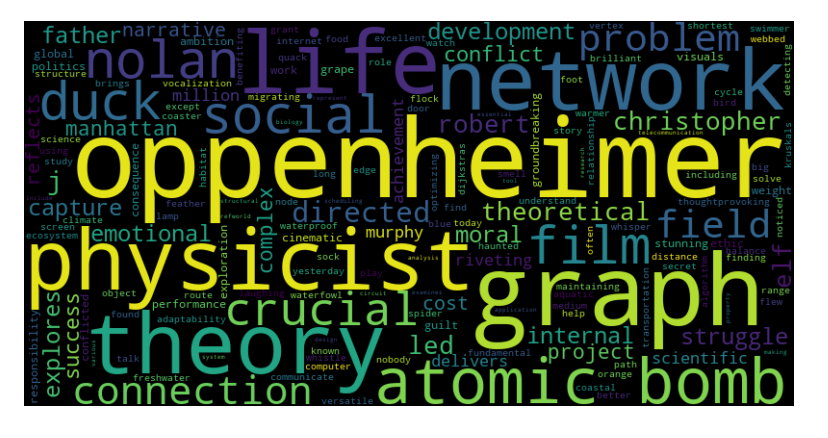

## Calculate cosine similarities using TFIDF

Calculate the TFIDF score and cosine similarity between the texts. You may use gensim, write your own script using numpy or use other module. Output the result as a matrix $n\times n$ of cosine similarity scores (where $n$ is the length of texts list).

**Extra credit**: use word2vec word embeddings in vector spaces to get better TFIDF scores by representing each word as a vector.

In [ ]:
def calcuate_tfidf(texts_processed):
    """
    Calculate TFIDF score between the texts in the list.

    Args:
        texts_processed (list): list of texts, processed in previous task.

    Returns:
        cosine_matrix (list): a matrix of cosine similarity scores.
    """
    words = [word for sentence in texts_processed for word in sentence]    
    vocabulary = sorted(set(words))
    vocabulary_dict = {k:i for i,k in enumerate(vocabulary)}
    text_len = len(texts_processed)
    vocabulary_len = len(vocabulary)
    
    tf = np.zeros((text_len, vocabulary_len), dtype=int)

    for i, doc in enumerate(texts_processed):
        for word in doc:
            tf[i, vocabulary_dict[word]] +=1
    
    idf = np.log(tf.shape[0]/tf.astype(bool).sum(axis=0))
    
    tfidf = tf * idf
    
    tfidf_norm = tfidf / np.linalg.norm(tfidf, axis = 1)[:,None]
    cosine_similarity = tfidf_norm @ tfidf_norm.T

    return cosine_similarity

cosine_matrix = calcuate_tfidf(texts_processed)
print(cosine_matrix)

[[1.         0.11144743 0.07660806 0.09045843 0.         0.
  0.         0.         0.         0.        ]
 [0.11144743 1.         0.04790291 0.02912177 0.         0.
  0.         0.         0.         0.        ]
 [0.07660806 0.04790291 1.         0.02862027 0.         0.
  0.         0.         0.         0.        ]
 [0.09045843 0.02912177 0.02862027 1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.02446395 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.02446395 0.
  1.         0.02428167 0.0278808  0.        ]
 [0.09045843 0.02912177 0.02862027 1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.02446395 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.02446395 0.
  1.         0.02428167 0.0278808  0.        ]
  0.02446395 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.02446395 0.
  1.         0.02428167 0.0278808  0.        ]
 [0.         0.         0.         0.         0.02446395 0.
  1.         0.02428167 0.0278808  0.        ]
  1.         0.02428167 0.0278808  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.02428167 1.         0.0722572  0.05414222]
 [0.         0.         0.         0.         0.         0.
  0.0278808  0.0722572  1.         0.11771278]
 [0.         0.         0.         0.         0.         0.
  0.         0.05414222 0.11771278 1.        ]]

## Visualize data

Visualize the `cosine_matrix` data using matplotlib. Choose your own method of plotting the scores in a way, that the similarity indeces between texts would be instantly visible. Plot data about texts as well (a couple of first words in the document).

*Hint: remember heat maps, aren't they nice for this task?*

In [ ]:
def visualize_data(cosine_matrix, texts_processed):
    """
    Visualize the cosine similarity matrix from the previous task. 

    Args:
        cosine_matrix (list): matrix of cosine similarity scores (values from 0.0 to 1.0 expected).
        texts_processed (list): list of texts, processed in previous task.

    Returns:
        None: None.
    """
    labels = [' '.join(text[:2]) for text in texts_processed]
    plt.figure(figsize=(8, 8))
    plt.imshow(cosine_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(ticks=np.arange(cosine_matrix.shape[1]), labels=np.arange(1, cosine_matrix.shape[1] + 1))
    plt.yticks(ticks=np.arange(cosine_matrix.shape[0]), labels=np.arange(1, cosine_matrix.shape[0] + 1))
    plt.show()

visualize_data(cosine_matrix, texts_processed)

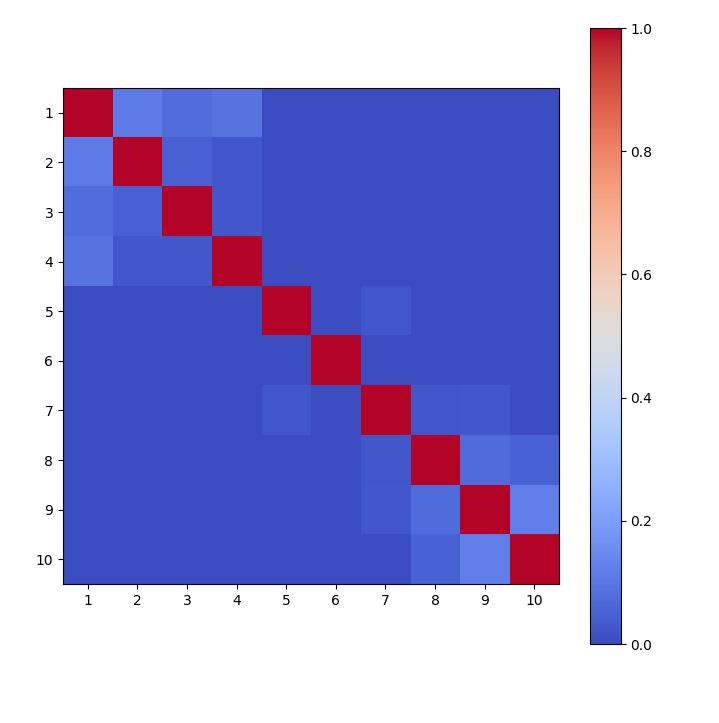

## Analyse your own text using TFIDF (or any other method)

Analyse your own text using previous methods. You may use API fetching to get text data, download texts from Kaggle or use any texts you want. Find cosine similarities and visualize them.

In [ ]:
def get_texts():
    """
    Get the texts you want to analyse. Either API fetching, Kaggle or any other source.

    Args:
        None: None.

    Returns:
        list: list of texts.
    """
    
texts = extract_texts_from_file('E:/Универ/5 kyrs\sci-tech_2/assignment-2-text-processing-and-nlp-BoikoAleks/resources/my_data.json')
print(texts)
texts_processed = process_texts(texts)
visualize_texts(texts_processed)
cosine_matrix = calcuate_tfidf(texts_processed)
visualize_data(cosine_matrix, texts_processed)

get_texts()

['Elon Musk is a prominent entrepreneur and innovator known for his transformative impact across multiple industries, from space travel to electric vehicles.', 'As the CEO of Tesla, Musk has championed the development of electric cars and sustainable energy solutions, reshaping the automotive industry and inspiring global interest in renewable technologies.', 'In addition, as the founder of SpaceX, Musk has advanced private space exploration, setting ambitious goals to reduce space travel costs and even colonize Mars, aiming to make humanity a multi-planetary species.', 'Musk’s ventures also include The Boring Company, which explores high-speed underground transportation, and Neuralink, a neurotechnology company developing brain-machine interfaces.', "Known for his ambitious vision, Musk is driven by goals that stretch beyond typical commercial success—he often speaks about safeguarding humanity's future and addressing critical issues like climate change.", 'Though he is often a polarizing figure, Musk’s influence on technology and his bold approaches to global challenges have made him one of the most influential figures of the 21st century.']

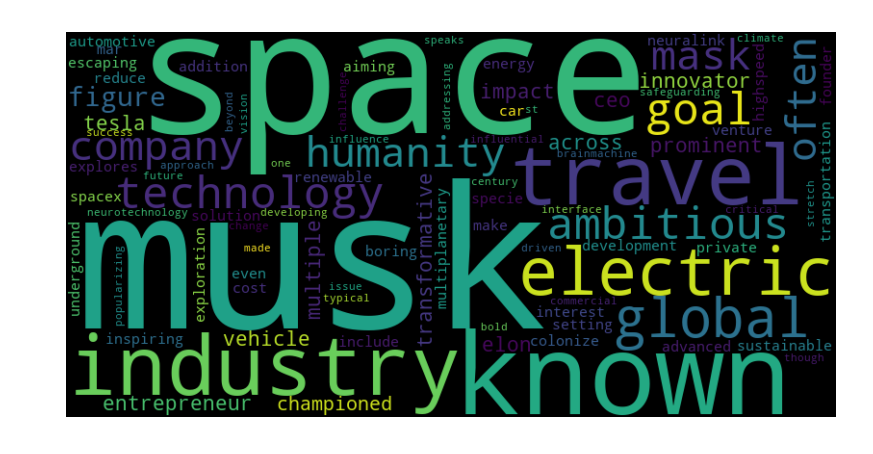

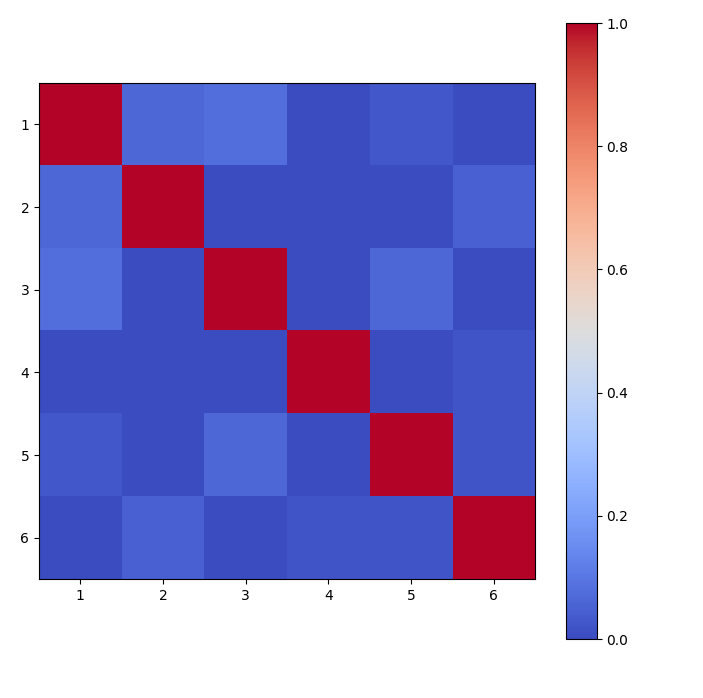